# Application d'Analyse DVF pour Investisseurs Immobiliers

Ce notebook fournit une application interactive d'analyse des données DVF (Demandes de Valeurs Foncières) pour aider les investisseurs immobiliers à prendre des décisions éclairées.

## 🎯 Objectifs
- **Analyse descriptive** des prix, surfaces et caractéristiques par zone
- **Évolution temporelle** des prix immobiliers (2019-2023)
- **Interface interactive** pour explorer les données par filtres
- **Recommandations d'investissement** basées sur les données DVF
- **Synthèse accessible** aux investisseurs non-techniques

## 📊 Données Utilisées
- **Source**: DVF (base officielle des transactions immobilières)
- **Période**: 2019-2023
- **Couverture**: Transactions nettoyées et enrichies avec prix/m²

---

## 1. Chargement et Exploration des Données Nettoyées

Chargement du dataset DVF préprocessé et exploration initiale pour comprendre la structure des données.

In [1]:
# Import des bibliothèques essentielles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import warnings
from pathlib import Path
import sys

# Configuration matplotlib pour les graphiques
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')

# Configuration des chemins
project_root = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
data_path = project_root / 'outputs' / 'dvf_cleaned_2019_2023.csv'
src_path = project_root / 'src'

# Ajout du chemin src pour les imports
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

print("📚 Bibliothèques chargées avec succès")
print(f"📁 Chemin des données: {data_path}")
print(f"🔧 Chemin source: {src_path}")

📚 Bibliothèques chargées avec succès
📁 Chemin des données: c:\Users\vtnde\Documents\Projets\ProjetFoncier\outputs\dvf_cleaned_2019_2023.csv
🔧 Chemin source: c:\Users\vtnde\Documents\Projets\ProjetFoncier\src


In [2]:
# Chargement des données nettoyées
print("📥 Chargement des données DVF nettoyées...")

try:
    df = pd.read_csv(data_path, low_memory=False)
    print(f"✅ Données chargées avec succès!")
    print(f"📊 Forme du dataset: {df.shape[0]:,} transactions x {df.shape[1]} colonnes")
    
    # Vérification des colonnes essentielles
    essential_cols = ['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 
                     'type_local', 'code_departement', 'nom_commune', 'date_mutation', 'prix_m2']
    
    missing_cols = [col for col in essential_cols if col not in df.columns]
    if missing_cols:
        print(f"⚠️ Colonnes manquantes: {missing_cols}")
    else:
        print("✅ Toutes les colonnes essentielles sont présentes")
        
    # Conversion de la date
    df['date_mutation'] = pd.to_datetime(df['date_mutation'])
    df['annee'] = df['date_mutation'].dt.year
    
    print(f"📅 Période couverte: {df['annee'].min()} - {df['annee'].max()}")
    
except FileNotFoundError:
    print(f"❌ Fichier non trouvé: {data_path}")
    print("Vérifiez que le preprocessing a été effectué (notebook 01_preprocessing.ipynb)")
except Exception as e:
    print(f"❌ Erreur lors du chargement: {e}")

📥 Chargement des données DVF nettoyées...
✅ Données chargées avec succès!
📊 Forme du dataset: 29,427 transactions x 46 colonnes
✅ Toutes les colonnes essentielles sont présentes
📅 Période couverte: 2024 - 2024


In [3]:
# Exploration initiale des données
print("🔍 APERÇU DES DONNÉES")
print("=" * 50)
print("\n📋 Informations générales:")
print(df.info())

print("\n🎯 Échantillon des données:")
display(df.head())

print("\n📊 Statistiques descriptives des variables numériques clés:")
display(df[['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'prix_m2']].describe())

🔍 APERÇU DES DONNÉES

📋 Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29427 entries, 0 to 29426
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id_mutation                   29427 non-null  object        
 1   date_mutation                 29427 non-null  datetime64[ns]
 2   numero_disposition            29427 non-null  float64       
 3   nature_mutation               29427 non-null  object        
 4   valeur_fonciere               29427 non-null  float64       
 5   adresse_numero                29320 non-null  float64       
 6   adresse_suffixe               2160 non-null   object        
 7   adresse_nom_voie              29427 non-null  object        
 8   adresse_code_voie             29427 non-null  object        
 9   code_postal                   29427 non-null  float64       
 10  code_commune                  29427 non-null  

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_terrain,longitude,latitude,annee_mutation,prix_m2,mois_mutation,trimestre_mutation,categorie_surface,categorie_prix_m2,annee
0,2024-1136527,2024-04-01,1.0,Vente,302000.0,11.0,NaN,RUE DE LA VARENNE,9614,94100.0,...,NaN,2.471997,48.809629,2024,5698.113208,4,2,Moyen (50-80m²),Élevé (4000-6000€/m²),2024
1,2024-1136529,2024-03-01,1.0,Vente,590825.0,33.0,NaN,RUE HOCHE,4460,94210.0,...,329.0,2.519719,48.793656,2024,8321.478873,3,1,Moyen (50-80m²),Très élevé (>6000€/m²),2024
2,2024-1136530,2024-05-01,1.0,Vente,210000.0,73.0,NaN,RUE PASTEUR,7140,94120.0,...,NaN,2.460341,48.847679,2024,6000.000000,5,2,Petit (30-50m²),Très élevé (>6000€/m²),2024
3,2024-1136530,2024-05-01,1.0,Vente,210000.0,73.0,NaN,RUE PASTEUR,7140,94120.0,...,NaN,2.460341,48.847679,2024,6000.000000,5,2,Petit (30-50m²),Très élevé (>6000€/m²),2024
4,2024-1136531,2024-05-01,1.0,Vente,116600.0,44.0,NaN,AV DU GENERAL DE GAULLE,4135,94170.0,...,NaN,2.512357,48.836744,2024,5300.000000,5,2,Très petit (<30m²),Élevé (4000-6000€/m²),2024



📊 Statistiques descriptives des variables numériques clés:


,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,prix_m2
count,2.942700e+04,29427.000000,29427.000000,29427.000000
mean,4.177445e+05,97.306249,3.045197,5583.207881
std,1.164997e+06,342.250738,1.652260,6016.537257
min,2.000000e+03,2.000000,0.000000,100.000000
25%,1.750000e+05,46.000000,2.000000,2921.348315
50%,2.700000e+05,66.000000,3.000000,3955.223881
75%,4.000000e+05,90.000000,4.000000,5853.658537
max,5.900000e+07,26841.000000,16.000000,50000.000000


## 2. Statistiques Descriptives par Zone

Analyse détaillée des prix, surfaces et caractéristiques par département et commune pour identifier les zones d'intérêt.

In [4]:
# Statistiques par département
print("🏛️ ANALYSE PAR DÉPARTEMENT")
print("=" * 50)

# Calcul des statistiques agrégées par département
dept_stats = df.groupby('code_departement').agg({
    'valeur_fonciere': ['count', 'mean', 'median', 'std'],
    'prix_m2': ['mean', 'median', 'std'],
    'surface_reelle_bati': ['mean', 'median'],
    'nombre_pieces_principales': ['mean', 'median']
}).round(2)

# Simplification des noms de colonnes
dept_stats.columns = ['nb_transactions', 'prix_moyen', 'prix_median', 'prix_std',
                     'prix_m2_moyen', 'prix_m2_median', 'prix_m2_std',
                     'surface_moyenne', 'surface_mediane', 
                     'pieces_moyenne', 'pieces_mediane']

# Tri par nombre de transactions
dept_stats = dept_stats.sort_values('nb_transactions', ascending=False)

print(f"📊 Top 10 des départements par volume de transactions:")
display(dept_stats.head(10))

🏛️ ANALYSE PAR DÉPARTEMENT
📊 Top 10 des départements par volume de transactions:


,nb_transactions,prix_moyen,prix_median,prix_std,prix_m2_moyen,prix_m2_median,prix_m2_std,surface_moyenne,surface_mediane,pieces_moyenne,pieces_mediane
code_departement,,,,,,,,,,,
94.0,14778,464851.45,300000.0,864947.00,6825.41,5136.15,6713.37,84.95,61.0,2.83,3.0
91.0,14649,370222.82,247000.0,1402590.42,4330.07,3228.19,4911.74,109.77,73.0,3.26,3.0


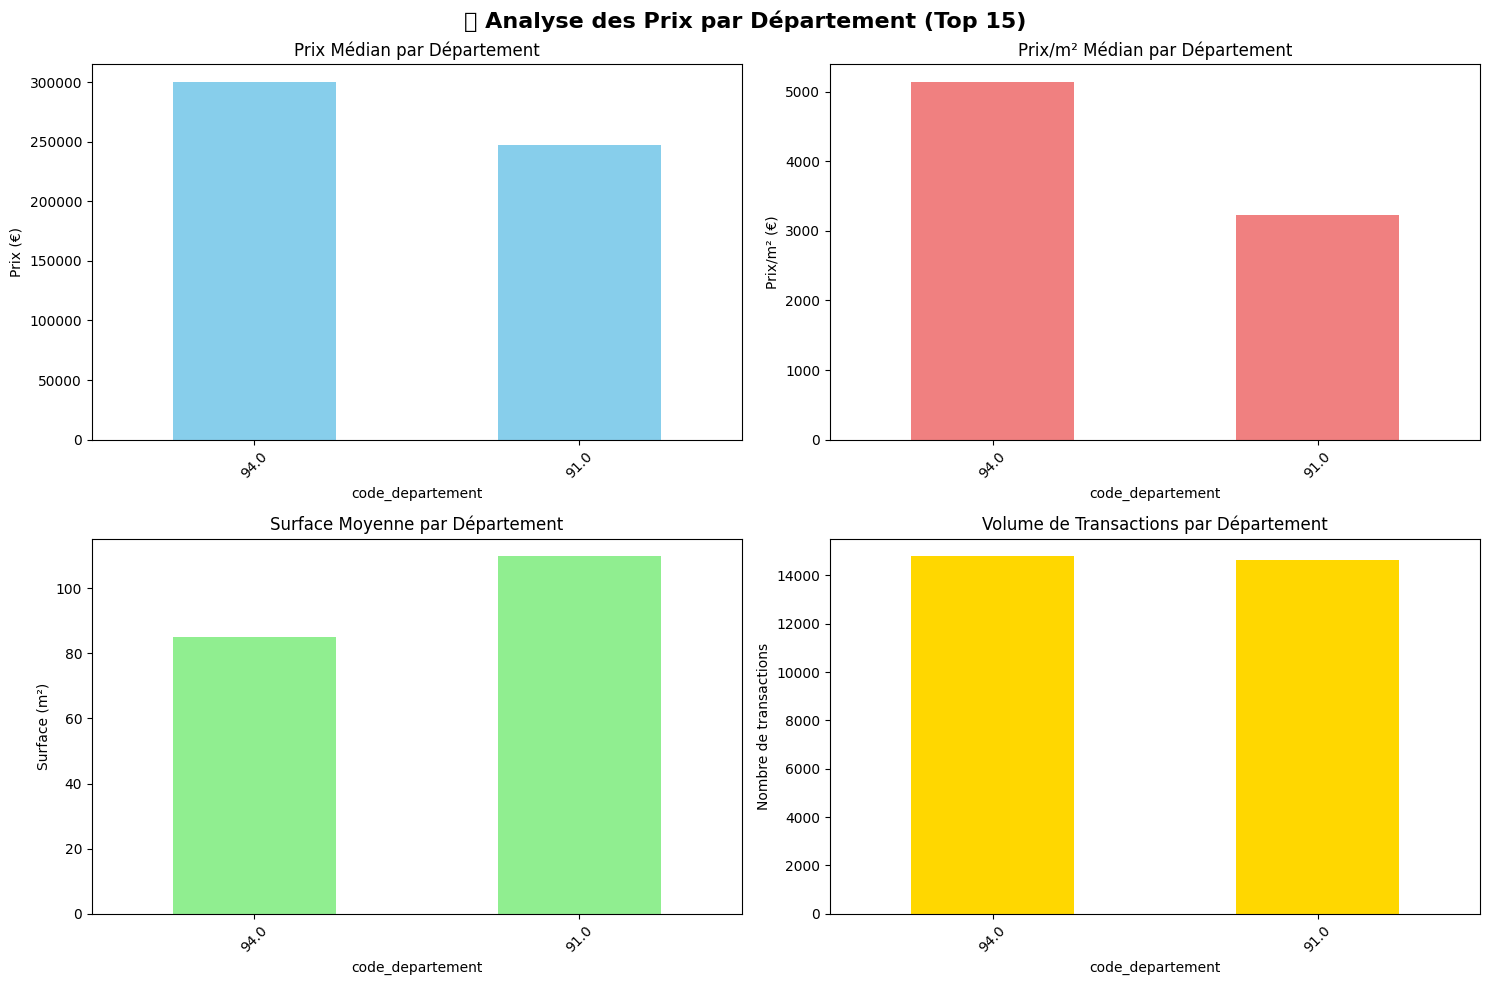

In [5]:
# Visualisation des prix par département
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 Analyse des Prix par Département (Top 15)', fontsize=16, fontweight='bold')

# Top 15 départements par volume
top_depts = dept_stats.head(15).index

# 1. Prix médian par département
ax1 = axes[0, 0]
dept_stats.loc[top_depts, 'prix_median'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Prix Médian par Département')
ax1.set_ylabel('Prix (€)')
ax1.tick_params(axis='x', rotation=45)

# 2. Prix/m² médian par département
ax2 = axes[0, 1]
dept_stats.loc[top_depts, 'prix_m2_median'].plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Prix/m² Médian par Département')
ax2.set_ylabel('Prix/m² (€)')
ax2.tick_params(axis='x', rotation=45)

# 3. Surface moyenne par département
ax3 = axes[1, 0]
dept_stats.loc[top_depts, 'surface_moyenne'].plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Surface Moyenne par Département')
ax3.set_ylabel('Surface (m²)')
ax3.tick_params(axis='x', rotation=45)

# 4. Nombre de transactions par département
ax4 = axes[1, 1]
dept_stats.loc[top_depts, 'nb_transactions'].plot(kind='bar', ax=ax4, color='gold')
ax4.set_title('Volume de Transactions par Département')
ax4.set_ylabel('Nombre de transactions')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [6]:
# Analyse des communes les plus actives
print("\n🏘️ ANALYSE PAR COMMUNE")
print("=" * 50)

# Top communes par volume de transactions
commune_stats = df.groupby(['code_departement', 'nom_commune']).agg({
    'valeur_fonciere': ['count', 'mean', 'median'],
    'prix_m2': ['mean', 'median'],
    'surface_reelle_bati': ['mean', 'median']
}).round(2)

# Simplification des colonnes
commune_stats.columns = ['nb_transactions', 'prix_moyen', 'prix_median',
                        'prix_m2_moyen', 'prix_m2_median', 
                        'surface_moyenne', 'surface_mediane']

# Filtrer les communes avec au moins 20 transactions pour plus de fiabilité
commune_stats_filtered = commune_stats[commune_stats['nb_transactions'] >= 20]
commune_stats_sorted = commune_stats_filtered.sort_values('nb_transactions', ascending=False)

print(f"📈 Top 20 des communes les plus actives (≥20 transactions):")
display(commune_stats_sorted.head(20))

# Identification des communes avec le meilleur rapport qualité/prix
print(f"\n💰 Top 10 des communes avec les prix/m² les plus attractifs (≥20 transactions):")
best_value_communes = commune_stats_filtered.sort_values('prix_m2_median').head(10)
display(best_value_communes[['nb_transactions', 'prix_m2_median', 'surface_moyenne', 'prix_median']])


🏘️ ANALYSE PAR COMMUNE
📈 Top 20 des communes les plus actives (≥20 transactions):


nb_transactions  prix_moyen  \
code_departement nom_commune                                          
94.0             Saint-Maur-des-Fossés             1272   609626.39   
                 Vincennes                          830   552226.65   
                 Valenton                           794   384707.27   
                 Champigny-sur-Marne                712   465910.36   
91.0             Corbeil-Essonnes                   689   187478.51   
94.0             Créteil                            644   433443.75   
                 Fontenay-sous-Bois                 625  1019039.32   
                 Vitry-sur-Seine                    590   402554.28   
                 Maisons-Alfort                     586   375378.16   
91.0             Évry-Courcouronnes                 569   287999.09   
                 Massy                              562   352017.09   
94.0             Ivry-sur-Seine                     517   408608.19   
                 Choisy-le-Roi                      487   225369.86   
                 Nogent-sur-Marne                   475   463927.19   
91.0             Savigny-sur-Orge                   468   290544.35   
94.0             Le Perreux-sur-Marne               458   460851.29   
                 Villejuif                          438   384078.09   
                 Alfortville                        391   284750.08   
91.0             Yerres                             381   451696.88   
94.0             Villiers-sur-Marne                 377   461536.30   

                                        prix_median  prix_m2_moyen  \
code_departement nom_commune                                         
94.0             Saint-Maur-des-Fossés     400000.0        7993.66   
                 Vincennes                 425000.0       10349.05   
                 Valenton                  385344.0        7307.68   
                 Champigny-sur-Marne       272000.0        7465.37   
91.0             Corbeil-Essonnes          140000.0        3611.99   
94.0             Créteil                   230000.0        6536.86   
                 Fontenay-sous-Bois        399600.0        9703.79   
                 Vitry-sur-Seine           240000.0        5337.56   
                 Maisons-Alfort            300095.0        6484.21   
91.0             Évry-Courcouronnes        152000.0        4213.60   
                 Massy                     238500.0        4335.77   
94.0             Ivry-sur-Seine            230000.0        6584.82   
                 Choisy-le-Roi             189000.0        5622.34   
                 Nogent-sur-Marne          350000.0        6350.16   
91.0             Savigny-sur-Orge          263500.0        4637.78   
94.0             Le Perreux-sur-Marne      350000.0        6522.78   
                 Villejuif                 278311.0        6904.38   
                 Alfortville               240000.0        5113.89   
91.0             Yerres                    268250.0        4896.77   
94.0             Villiers-sur-Marne        263675.0        6895.89   

                                        prix_m2_median  surface_moyenne  \
code_departement nom_commune                                              
94.0             Saint-Maur-des-Fossés         6000.00            85.42   
                 Vincennes                     8571.90            56.94   
                 Valenton                      6643.86            61.72   
                 Champigny-sur-Marne           4074.92            81.30   
91.0             Corbeil-Essonnes              2702.70            66.94   
94.0             Créteil                       3830.44           116.98   
                 Fontenay-sous-Bois            6291.82           116.82   
                 Vitry-sur-Seine               4152.31            99.06   
                 Maisons-Alfort                5613.22            65.44   
91.0             Évry-Courcouronnes            2343.75            98.32   
                 Massy              


💰 Top 10 des communes avec les prix/m² les plus attractifs (≥20 transactions):


nb_transactions  prix_m2_median  \
code_departement nom_commune                                           
91.0             Grigny                          202         1299.35   
                 Épinay-sous-Sénart               77         2012.66   
                 Angerville                       74         2227.43   
                 Saclas                           27         2268.29   
                 Pussay                           43         2285.71   
                 Ris-Orangis                     291         2327.59   
                 Évry-Courcouronnes              569         2343.75   
                 Le Mérévillois                   52         2388.89   
                 Baulne                           34         2452.69   
                 Étampes                         346         2453.69   

                                     surface_moyenne  prix_median  
code_departement nom_commune                                       
91.0             Grigny                        64.96     72953.38  
                 Épinay-sous-Sénart            91.12    121000.00  
                 Angerville                   243.68    220000.00  
                 Saclas                        94.41    210000.00  
                 Pussay                        70.58    160001.00  
                 Ris-Orangis                   81.33    146000.00  
                 Évry-Courcouronnes            98.32    152000.00  
                 Le Mérévillois                91.56    202500.00  
                 Baulne                        87.12    215900.00  
                 Étampes                       94.51    143500.00

## 3. Analyse par Type de Bien avec Interface Interactive

Comparaison entre appartements et maisons avec des contrôles interactifs pour filtrer et analyser les différences.

In [7]:
# Analyse des types de biens
print("🏠 RÉPARTITION PAR TYPE DE BIEN")
print("=" * 50)

# Distribution des types de locaux
type_distribution = df['type_local'].value_counts()
print("\n📊 Distribution des types de biens:")
for type_bien, count in type_distribution.items():
    percentage = (count / len(df)) * 100
    print(f"  {type_bien}: {count:,} transactions ({percentage:.1f}%)")

# Focus sur appartements vs maisons
appartements = df[df['type_local'] == 'Appartement'].copy()
maisons = df[df['type_local'] == 'Maison'].copy()

print(f"\n🏢 Appartements: {len(appartements):,} transactions")
print(f"🏠 Maisons: {len(maisons):,} transactions")

🏠 RÉPARTITION PAR TYPE DE BIEN

📊 Distribution des types de biens:
  Appartement: 17,528 transactions (59.6%)
  Maison: 9,669 transactions (32.9%)
  Local industriel. commercial ou assimilé: 2,230 transactions (7.6%)

🏢 Appartements: 17,528 transactions
🏠 Maisons: 9,669 transactions


In [8]:
# Widget interactif pour comparaison des types de biens
print("🎛️ INTERFACE INTERACTIVE - COMPARAISON DES TYPES DE BIENS")
print("=" * 60)

# Création des widgets
type_selector = widgets.SelectMultiple(
    options=['Appartement', 'Maison'],
    value=['Appartement', 'Maison'],
    description='Types:',
    disabled=False
)

dept_selector = widgets.Dropdown(
    options=['Tous'] + sorted(df['code_departement'].unique().astype(str)),
    value='Tous',
    description='Département:'
)

pieces_filter = widgets.IntRangeSlider(
    value=[1, 10],
    min=1,
    max=int(df['nombre_pieces_principales'].max()),
    step=1,
    description='Pièces:',
    readout=True
)

surface_filter = widgets.IntRangeSlider(
    value=[20, 200],
    min=int(df['surface_reelle_bati'].min()),
    max=min(300, int(df['surface_reelle_bati'].max())),
    step=10,
    description='Surface (m²):',
    readout=True
)

output_area = widgets.Output()

def analyze_property_types(types, dept, pieces_range, surface_range):
    """Fonction d'analyse interactive des types de biens"""
    with output_area:
        clear_output(wait=True)
        
        # Filtrage des données
        filtered_df = df.copy()
        
        # Filtre par type
        filtered_df = filtered_df[filtered_df['type_local'].isin(types)]
        
        # Filtre par département
        if dept != 'Tous':
            filtered_df = filtered_df[filtered_df['code_departement'] == dept]
        
        # Filtre par nombre de pièces et surface
        filtered_df = filtered_df[
            (filtered_df['nombre_pieces_principales'] >= pieces_range[0]) &
            (filtered_df['nombre_pieces_principales'] <= pieces_range[1]) &
            (filtered_df['surface_reelle_bati'] >= surface_range[0]) &
            (filtered_df['surface_reelle_bati'] <= surface_range[1])
        ]
        
        if len(filtered_df) == 0:
            print("❌ Aucune donnée ne correspond aux filtres sélectionnés")
            return
        
        print(f"📊 Analyse sur {len(filtered_df):,} transactions")
        print("=" * 50)
        
        # Statistiques comparatives par type
        comparison_stats = filtered_df.groupby('type_local').agg({
            'valeur_fonciere': ['count', 'mean', 'median'],
            'prix_m2': ['mean', 'median'],
            'surface_reelle_bati': ['mean', 'median'],
            'nombre_pieces_principales': ['mean', 'median']
        }).round(2)
        
        comparison_stats.columns = ['nb_transactions', 'prix_moyen', 'prix_median',
                                  'prix_m2_moyen', 'prix_m2_median',
                                  'surface_moyenne', 'surface_mediane',
                                  'pieces_moyenne', 'pieces_mediane']
        
        display(comparison_stats)
        
        # Visualisation comparative
        if len(types) > 1:
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            fig.suptitle('Comparaison par Type de Bien', fontsize=14, fontweight='bold')
            
            # Prix médian
            ax1 = axes[0]
            comparison_stats['prix_median'].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
            ax1.set_title('Prix Médian')
            ax1.set_ylabel('Prix (€)')
            ax1.tick_params(axis='x', rotation=45)
            
            # Prix/m² médian
            ax2 = axes[1]
            comparison_stats['prix_m2_median'].plot(kind='bar', ax=ax2, color=['lightgreen', 'gold'])
            ax2.set_title('Prix/m² Médian')
            ax2.set_ylabel('Prix/m² (€)')
            ax2.tick_params(axis='x', rotation=45)
            
            # Surface moyenne
            ax3 = axes[2]
            comparison_stats['surface_moyenne'].plot(kind='bar', ax=ax3, color=['orange', 'purple'])
            ax3.set_title('Surface Moyenne')
            ax3.set_ylabel('Surface (m²)')
            ax3.tick_params(axis='x', rotation=45)
            
            plt.tight_layout()
            plt.show()

# Interface interactive
interactive_widget = widgets.interactive(
    analyze_property_types,
    types=type_selector,
    dept=dept_selector,
    pieces_range=pieces_filter,
    surface_range=surface_filter
)

# Affichage des contrôles et de la sortie
controls = widgets.VBox([
    widgets.HBox([type_selector, dept_selector]),
    widgets.HBox([pieces_filter, surface_filter])
])

display(controls)
display(output_area)

# Exécution initiale
analyze_property_types(['Appartement', 'Maison'], 'Tous', [1, 10], [20, 200])

🎛️ INTERFACE INTERACTIVE - COMPARAISON DES TYPES DE BIENS


Output()

## 4. Évolution Temporelle des Prix (2019-2023)

Analyse des tendances de prix dans le temps pour identifier les cycles et opportunités d'investissement.

In [9]:
# Analyse temporelle des prix
print("📈 ÉVOLUTION TEMPORELLE DES PRIX")
print("=" * 50)

# Calcul des statistiques annuelles
yearly_stats = df.groupby('annee').agg({
    'valeur_fonciere': ['count', 'mean', 'median'],
    'prix_m2': ['mean', 'median', 'std'],
    'surface_reelle_bati': ['mean', 'median']
}).round(2)

yearly_stats.columns = ['nb_transactions', 'prix_moyen', 'prix_median',
                       'prix_m2_moyen', 'prix_m2_median', 'prix_m2_std',
                       'surface_moyenne', 'surface_mediane']

print("📊 Évolution annuelle:")
display(yearly_stats)

# Calcul des variations annuelles
prix_evolution = yearly_stats[['prix_median', 'prix_m2_median']].copy()
prix_evolution['variation_prix_pct'] = prix_evolution['prix_median'].pct_change() * 100
prix_evolution['variation_prix_m2_pct'] = prix_evolution['prix_m2_median'].pct_change() * 100

print("\n📈 Variations annuelles:")
display(prix_evolution.round(2))

📈 ÉVOLUTION TEMPORELLE DES PRIX
📊 Évolution annuelle:


,nb_transactions,prix_moyen,prix_median,prix_m2_moyen,prix_m2_median,prix_m2_std,surface_moyenne,surface_mediane
annee,,,,,,,,
2024,29427,417744.55,270000.0,5583.21,3955.22,6016.54,97.31,66.0



📈 Variations annuelles:


,prix_median,prix_m2_median,variation_prix_pct,variation_prix_m2_pct
annee,,,,
2024,270000.0,3955.22,NaN,NaN


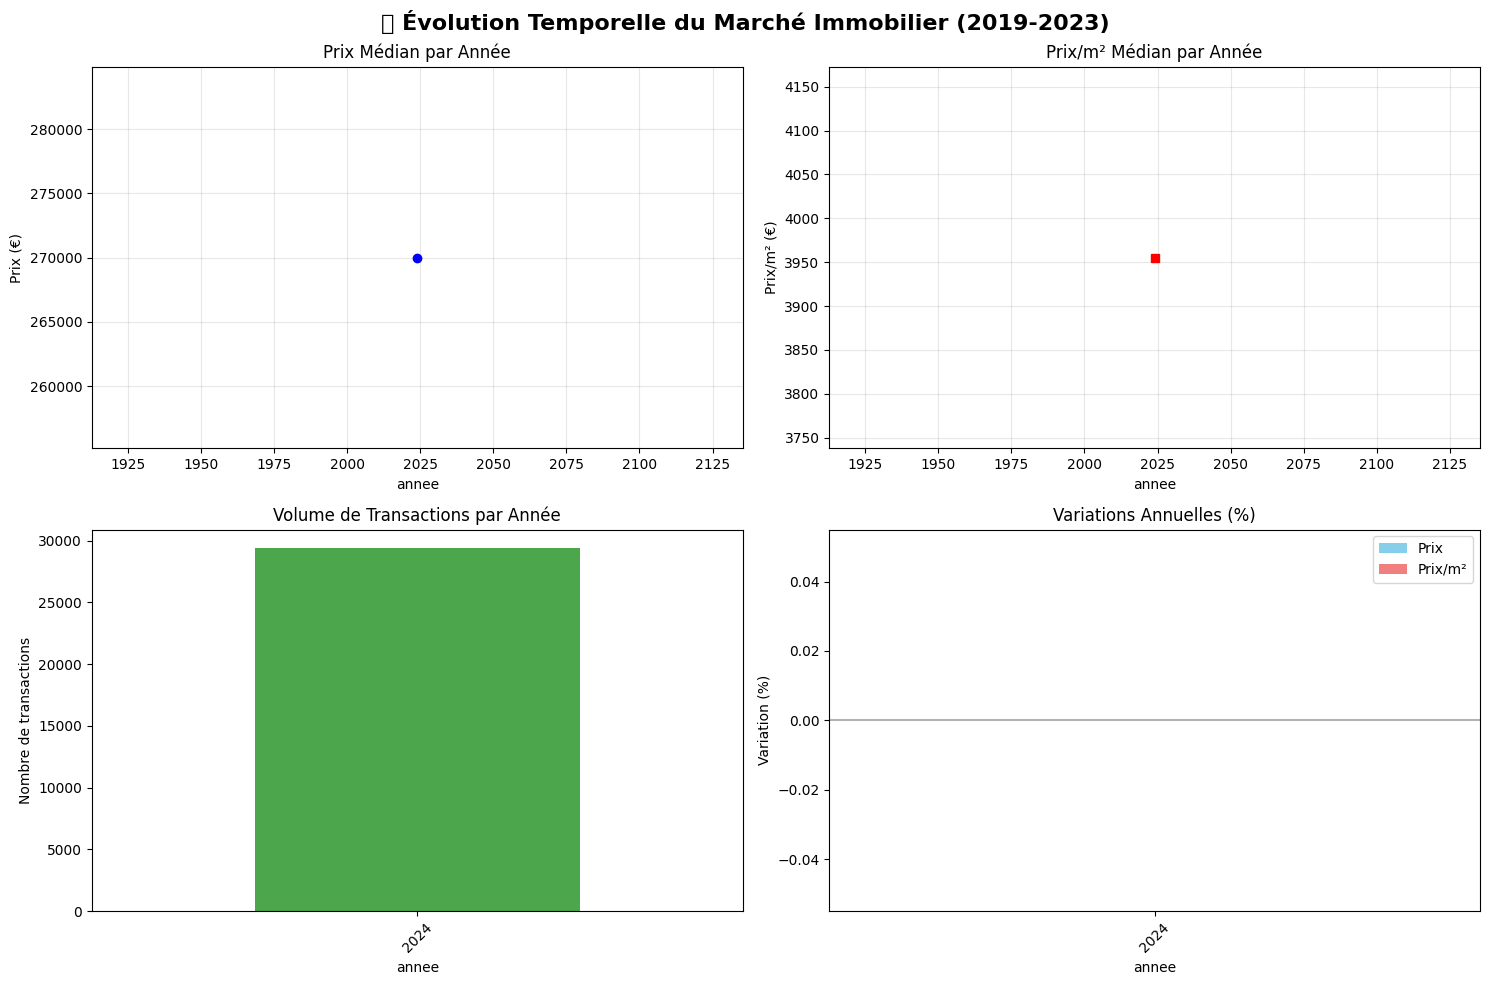


🏠 ÉVOLUTION PAR TYPE DE BIEN
Prix/m² médian par type:


type_local,Appartement,Maison
annee,,
2024,4186.05,3707.26


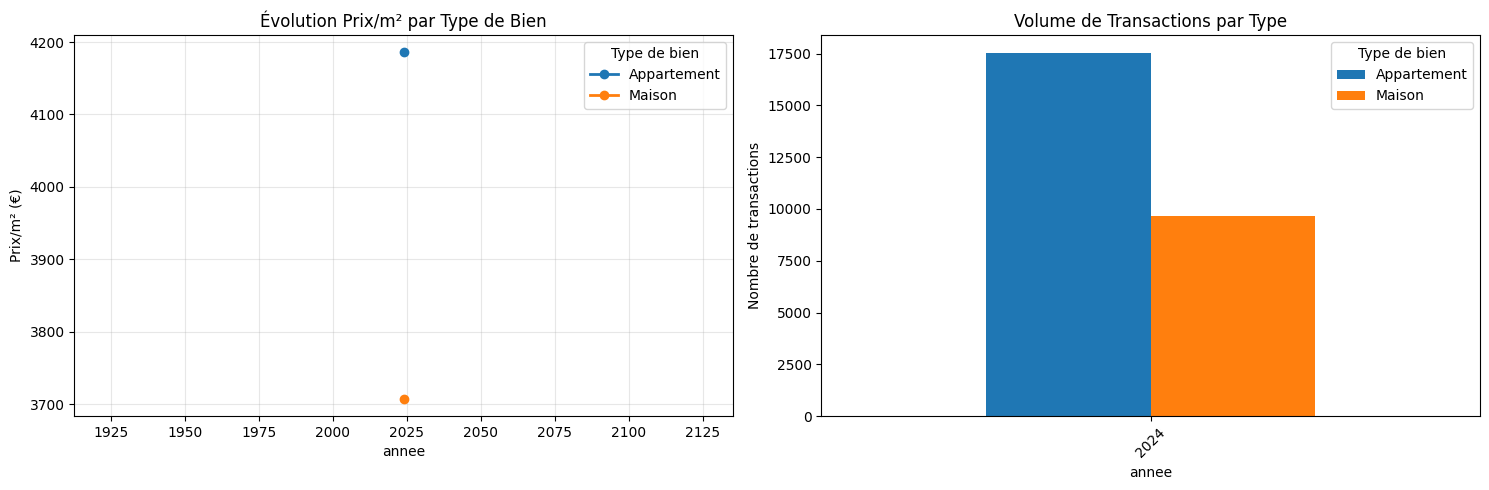

In [10]:
# Visualisation de l'évolution temporelle
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📈 Évolution Temporelle du Marché Immobilier (2019-2023)', fontsize=16, fontweight='bold')

# 1. Évolution du prix médian
ax1 = axes[0, 0]
yearly_stats['prix_median'].plot(kind='line', ax=ax1, marker='o', color='blue', linewidth=2)
ax1.set_title('Prix Médian par Année')
ax1.set_ylabel('Prix (€)')
ax1.grid(True, alpha=0.3)

# 2. Évolution du prix/m² médian
ax2 = axes[0, 1]
yearly_stats['prix_m2_median'].plot(kind='line', ax=ax2, marker='s', color='red', linewidth=2)
ax2.set_title('Prix/m² Médian par Année')
ax2.set_ylabel('Prix/m² (€)')
ax2.grid(True, alpha=0.3)

# 3. Volume de transactions
ax3 = axes[1, 0]
yearly_stats['nb_transactions'].plot(kind='bar', ax=ax3, color='green', alpha=0.7)
ax3.set_title('Volume de Transactions par Année')
ax3.set_ylabel('Nombre de transactions')
ax3.tick_params(axis='x', rotation=45)

# 4. Variations annuelles
ax4 = axes[1, 1]
prix_evolution[['variation_prix_pct', 'variation_prix_m2_pct']].plot(
    kind='bar', ax=ax4, color=['skyblue', 'lightcoral']
)
ax4.set_title('Variations Annuelles (%)')
ax4.set_ylabel('Variation (%)')
ax4.tick_params(axis='x', rotation=45)
ax4.legend(['Prix', 'Prix/m²'])
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse par type de bien dans le temps
print("\n🏠 ÉVOLUTION PAR TYPE DE BIEN")
print("=" * 40)

# Évolution des appartements vs maisons
temporal_by_type = df[df['type_local'].isin(['Appartement', 'Maison'])].groupby(['annee', 'type_local']).agg({
    'prix_m2': 'median',
    'valeur_fonciere': 'count'
}).round(2)

temporal_by_type.columns = ['prix_m2_median', 'nb_transactions']

# Pivot pour faciliter la visualisation
prix_m2_pivot = temporal_by_type['prix_m2_median'].unstack()
volume_pivot = temporal_by_type['nb_transactions'].unstack()

print("Prix/m² médian par type:")
display(prix_m2_pivot)

# Visualisation comparative
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Prix/m² par type
ax1 = axes[0]
prix_m2_pivot.plot(kind='line', ax=ax1, marker='o', linewidth=2)
ax1.set_title('Évolution Prix/m² par Type de Bien')
ax1.set_ylabel('Prix/m² (€)')
ax1.legend(title='Type de bien')
ax1.grid(True, alpha=0.3)

# Volume par type
ax2 = axes[1]
volume_pivot.plot(kind='bar', ax=ax2)
ax2.set_title('Volume de Transactions par Type')
ax2.set_ylabel('Nombre de transactions')
ax2.legend(title='Type de bien')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 5. Tableau de Bord Interactif Principal

Interface principale pour explorer les données DVF avec des filtres dynamiques et des visualisations en temps réel.

In [11]:
# Configuration du tableau de bord principal
print("🎛️ TABLEAU DE BORD INTERACTIF PRINCIPAL")
print("=" * 60)
print("Utilisez les contrôles ci-dessous pour explorer les données selon vos critères d'investissement.")

# Variables globales pour le dashboard
dashboard_output = widgets.Output()
current_filtered_data = df.copy()

# Création des widgets de contrôle
print("\n🔧 Configuration des contrôles...")

# Sélecteur de département
dept_options = ['Tous'] + sorted([str(d) for d in df['code_departement'].unique() if pd.notna(d)])
dashboard_dept = widgets.Dropdown(
    options=dept_options,
    value='Tous',
    description='Département:',
    style={'description_width': 'initial'}
)

# Sélecteur d'années (slider range)
min_year, max_year = int(df['annee'].min()), int(df['annee'].max())
dashboard_years = widgets.IntRangeSlider(
    value=[min_year, max_year],
    min=min_year,
    max=max_year,
    step=1,
    description='Années:',
    readout=True,
    style={'description_width': 'initial'}
)

# Filtre de prix
min_prix = int(df['valeur_fonciere'].quantile(0.05))
max_prix = int(df['valeur_fonciere'].quantile(0.95))
dashboard_prix = widgets.IntRangeSlider(
    value=[min_prix, max_prix],
    min=int(df['valeur_fonciere'].min()),
    max=max_prix,
    step=10000,
    description='Prix (€):',
    readout=True,
    readout_format='d',
    style={'description_width': 'initial'}
)

# Filtre de surface
min_surface = int(df['surface_reelle_bati'].quantile(0.05))
max_surface = int(df['surface_reelle_bati'].quantile(0.95))
dashboard_surface = widgets.IntRangeSlider(
    value=[min_surface, max_surface],
    min=int(df['surface_reelle_bati'].min()),
    max=max_surface,
    step=5,
    description='Surface (m²):',
    readout=True,
    style={'description_width': 'initial'}
)

# Sélecteur de type de bien
dashboard_type = widgets.SelectMultiple(
    options=df['type_local'].unique().tolist(),
    value=['Appartement', 'Maison'],
    description='Types:',
    rows=3,
    style={'description_width': 'initial'}
)

# Filtre de prix/m²
min_prix_m2 = int(df['prix_m2'].quantile(0.05))
max_prix_m2 = int(df['prix_m2'].quantile(0.95))
dashboard_prix_m2 = widgets.IntRangeSlider(
    value=[min_prix_m2, max_prix_m2],
    min=int(df['prix_m2'].min()),
    max=max_prix_m2,
    step=100,
    description='Prix/m² (€):',
    readout=True,
    style={'description_width': 'initial'}
)

print("✅ Contrôles configurés")

# Fonction principale du dashboard
def update_dashboard(dept, years, prix_range, surface_range, types, prix_m2_range):
    """Met à jour le dashboard avec les filtres sélectionnés"""
    global current_filtered_data
    
    with dashboard_output:
        clear_output(wait=True)
        
        # Application des filtres
        filtered_data = df.copy()
        
        # Filtre par département
        if dept != 'Tous':
            filtered_data = filtered_data[filtered_data['code_departement'] == dept]
        
        # Filtre par années
        filtered_data = filtered_data[
            (filtered_data['annee'] >= years[0]) & 
            (filtered_data['annee'] <= years[1])
        ]
        
        # Filtre par prix
        filtered_data = filtered_data[
            (filtered_data['valeur_fonciere'] >= prix_range[0]) & 
            (filtered_data['valeur_fonciere'] <= prix_range[1])
        ]
        
        # Filtre par surface
        filtered_data = filtered_data[
            (filtered_data['surface_reelle_bati'] >= surface_range[0]) & 
            (filtered_data['surface_reelle_bati'] <= surface_range[1])
        ]
        
        # Filtre par type
        filtered_data = filtered_data[filtered_data['type_local'].isin(types)]
        
        # Filtre par prix/m²
        filtered_data = filtered_data[
            (filtered_data['prix_m2'] >= prix_m2_range[0]) & 
            (filtered_data['prix_m2'] <= prix_m2_range[1])
        ]
        
        current_filtered_data = filtered_data
        
        if len(filtered_data) == 0:
            print("❌ Aucune donnée ne correspond aux critères sélectionnés")
            print("💡 Conseil: Élargissez les fourchettes de prix ou de surface")
            return
        
        # Affichage des résultats filtrés
        print(f"🎯 RÉSULTATS FILTRÉS: {len(filtered_data):,} transactions")
        print("=" * 60)
        
        # Statistiques générales
        stats_generales = {
            'Nombre de transactions': f"{len(filtered_data):,}",
            'Prix médian': f"{filtered_data['valeur_fonciere'].median():,.0f} €",
            'Prix/m² médian': f"{filtered_data['prix_m2'].median():,.0f} €/m²",
            'Surface médiane': f"{filtered_data['surface_reelle_bati'].median():.0f} m²",
            'Période': f"{filtered_data['annee'].min()} - {filtered_data['annee'].max()}"
        }
        
        print("📊 STATISTIQUES GÉNÉRALES:")
        for key, value in stats_generales.items():
            print(f"  • {key}: {value}")
        
        # Top communes dans la sélection
        if len(filtered_data) > 0:
            top_communes = filtered_data.groupby('nom_commune').agg({
                'valeur_fonciere': 'count',
                'prix_m2': 'median'
            }).round(0)
            top_communes.columns = ['nb_transactions', 'prix_m2_median']
            top_communes = top_communes.sort_values('nb_transactions', ascending=False).head(10)
            
            print(f"\n🏘️ TOP 10 COMMUNES (dans la sélection):")
            for commune, row in top_communes.iterrows():
                print(f"  • {commune}: {row['nb_transactions']:.0f} transactions, {row['prix_m2_median']:.0f} €/m²")

# Interface widget interactif
dashboard_widget = widgets.interactive(
    update_dashboard,
    dept=dashboard_dept,
    years=dashboard_years,
    prix_range=dashboard_prix,
    surface_range=dashboard_surface,
    types=dashboard_type,
    prix_m2_range=dashboard_prix_m2
)

print("\n🎛️ Utilisez les contrôles ci-dessous pour filtrer les données:")

🎛️ TABLEAU DE BORD INTERACTIF PRINCIPAL
Utilisez les contrôles ci-dessous pour explorer les données selon vos critères d'investissement.

🔧 Configuration des contrôles...
✅ Contrôles configurés

🎛️ Utilisez les contrôles ci-dessous pour filtrer les données:


In [12]:
# Affichage du tableau de bord
dashboard_controls = widgets.VBox([
    widgets.HTML("<h3>🎛️ Contrôles du Tableau de Bord</h3>"),
    widgets.HBox([dashboard_dept, dashboard_years]),
    widgets.HBox([dashboard_prix, dashboard_surface]),
    widgets.HBox([dashboard_type, dashboard_prix_m2]),
    widgets.HTML("<hr>")
])

display(dashboard_controls)
display(dashboard_output)

# Initialisation avec tous les filtres par défaut
update_dashboard('Tous', [min_year, max_year], [min_prix, max_prix], 
                [min_surface, max_surface], ['Appartement', 'Maison'], 
                [min_prix_m2, max_prix_m2])

Output()

## 6. Visualisations Dynamiques

Graphiques interactifs qui se mettent à jour automatiquement selon les filtres du tableau de bord.

In [13]:
# Bouton pour générer les visualisations dynamiques
viz_output = widgets.Output()
viz_button = widgets.Button(
    description='📊 Générer Visualisations',
    button_style='info',
    tooltip='Cliquez pour mettre à jour les graphiques avec les filtres actuels',
    icon='chart-bar'
)

def generate_visualizations(button):
    """Génère les visualisations basées sur les données filtrées"""
    with viz_output:
        clear_output(wait=True)
        
        if len(current_filtered_data) == 0:
            print("❌ Aucune donnée à visualiser. Ajustez les filtres du tableau de bord.")
            return
        
        print(f"📊 Génération des visualisations pour {len(current_filtered_data):,} transactions...")
        
        # Configuration de la figure principale
        fig = plt.figure(figsize=(20, 15))
        gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)
        
        # 1. Histogramme des prix
        ax1 = fig.add_subplot(gs[0, 0])
        current_filtered_data['valeur_fonciere'].hist(bins=30, ax=ax1, color='skyblue', alpha=0.7, edgecolor='black')
        ax1.set_title('Distribution des Prix de Vente')
        ax1.set_xlabel('Prix (€)')
        ax1.set_ylabel('Fréquence')
        ax1.grid(True, alpha=0.3)
        
        # 2. Histogramme des prix/m²
        ax2 = fig.add_subplot(gs[0, 1])
        current_filtered_data['prix_m2'].hist(bins=30, ax=ax2, color='lightcoral', alpha=0.7, edgecolor='black')
        ax2.set_title('Distribution des Prix/m²')
        ax2.set_xlabel('Prix/m² (€)')
        ax2.set_ylabel('Fréquence')
        ax2.grid(True, alpha=0.3)
        
        # 3. Histogramme des surfaces
        ax3 = fig.add_subplot(gs[0, 2])
        current_filtered_data['surface_reelle_bati'].hist(bins=30, ax=ax3, color='lightgreen', alpha=0.7, edgecolor='black')
        ax3.set_title('Distribution des Surfaces')
        ax3.set_xlabel('Surface (m²)')
        ax3.set_ylabel('Fréquence')
        ax3.grid(True, alpha=0.3)
        
        # 4. Boxplot des prix par type de bien
        ax4 = fig.add_subplot(gs[1, 0])
        if 'type_local' in current_filtered_data.columns:
            types_available = current_filtered_data['type_local'].unique()
            box_data = [current_filtered_data[current_filtered_data['type_local'] == t]['valeur_fonciere'] 
                       for t in types_available]
            ax4.boxplot(box_data, labels=types_available)
            ax4.set_title('Prix par Type de Bien')
            ax4.set_ylabel('Prix (€)')
            ax4.tick_params(axis='x', rotation=45)
        
        # 5. Boxplot des prix/m² par type de bien
        ax5 = fig.add_subplot(gs[1, 1])
        if 'type_local' in current_filtered_data.columns:
            box_data_m2 = [current_filtered_data[current_filtered_data['type_local'] == t]['prix_m2'] 
                          for t in types_available]
            ax5.boxplot(box_data_m2, labels=types_available)
            ax5.set_title('Prix/m² par Type de Bien')
            ax5.set_ylabel('Prix/m² (€)')
            ax5.tick_params(axis='x', rotation=45)
        
        # 6. Évolution temporelle (si plusieurs années)
        ax6 = fig.add_subplot(gs[1, 2])
        if current_filtered_data['annee'].nunique() > 1:
            yearly_trend = current_filtered_data.groupby('annee')['prix_m2'].median()
            yearly_trend.plot(kind='line', ax=ax6, marker='o', color='red', linewidth=2)
            ax6.set_title('Évolution Prix/m² Médian')
            ax6.set_xlabel('Année')
            ax6.set_ylabel('Prix/m² (€)')
            ax6.grid(True, alpha=0.3)
        else:
            ax6.text(0.5, 0.5, 'Évolution temporelle\n(une seule année sélectionnée)', 
                    ha='center', va='center', transform=ax6.transAxes)
            ax6.set_title('Évolution Temporelle')
        
        # 7. Nuage de points Surface vs Prix
        ax7 = fig.add_subplot(gs[2, 0])
        ax7.scatter(current_filtered_data['surface_reelle_bati'], 
                   current_filtered_data['valeur_fonciere'], 
                   alpha=0.5, color='purple')
        ax7.set_title('Relation Surface vs Prix')
        ax7.set_xlabel('Surface (m²)')
        ax7.set_ylabel('Prix (€)')
        ax7.grid(True, alpha=0.3)
        
        # 8. Top communes par volume
        ax8 = fig.add_subplot(gs[2, 1])
        top_communes_viz = current_filtered_data.groupby('nom_commune').size().sort_values(ascending=False).head(10)
        top_communes_viz.plot(kind='barh', ax=ax8, color='orange')
        ax8.set_title('Top 10 Communes par Volume')
        ax8.set_xlabel('Nombre de transactions')
        
        # 9. Prix moyen par nombre de pièces
        ax9 = fig.add_subplot(gs[2, 2])
        if 'nombre_pieces_principales' in current_filtered_data.columns:
            pieces_prix = current_filtered_data.groupby('nombre_pieces_principales')['prix_m2'].median().head(8)
            pieces_prix.plot(kind='bar', ax=ax9, color='gold')
            ax9.set_title('Prix/m² Médian par Nb de Pièces')
            ax9.set_xlabel('Nombre de pièces')
            ax9.set_ylabel('Prix/m² (€)')
            ax9.tick_params(axis='x', rotation=0)
        
        # 10. Heatmap simple - Prix par département et type (si applicable)
        ax10 = fig.add_subplot(gs[3, :])
        if current_filtered_data['code_departement'].nunique() > 1 and len(types_available) > 1:
            pivot_data = current_filtered_data.groupby(['code_departement', 'type_local'])['prix_m2'].median().unstack()
            if not pivot_data.empty:
                im = ax10.imshow(pivot_data.T.values, cmap='YlOrRd', aspect='auto')
                ax10.set_xticks(range(len(pivot_data.index)))
                ax10.set_xticklabels(pivot_data.index, rotation=45)
                ax10.set_yticks(range(len(pivot_data.columns)))
                ax10.set_yticklabels(pivot_data.columns)
                ax10.set_title('Heatmap Prix/m² Médian par Département et Type')
                
                # Colorbar
                cbar = plt.colorbar(im, ax=ax10)
                cbar.set_label('Prix/m² (€)')
        else:
            ax10.text(0.5, 0.5, 'Heatmap indisponible\n(filtres trop restrictifs)', 
                     ha='center', va='center', transform=ax10.transAxes)
            ax10.set_title('Heatmap Prix/m²')
        
        plt.suptitle(f'📊 Visualisations Dynamiques - {len(current_filtered_data):,} transactions', 
                     fontsize=16, fontweight='bold')
        plt.show()
        
        print("✅ Visualisations générées avec succès!")
        print("💡 Ajustez les filtres du tableau de bord ci-dessus et relancez pour voir les changements.")

viz_button.on_click(generate_visualizations)

print("🎨 VISUALISATIONS INTERACTIVES")
print("=" * 50)
print("Cliquez sur le bouton ci-dessous pour générer des graphiques basés sur vos filtres actuels.")

display(viz_button)
display(viz_output)

🎨 VISUALISATIONS INTERACTIVES
Cliquez sur le bouton ci-dessous pour générer des graphiques basés sur vos filtres actuels.


Button(button_style='info', description='📊 Générer Visualisations', icon='chart-bar', style=ButtonStyle(), too…

Output()

## 7. Panneau de Statistiques Dynamiques

Tableau de bord avancé avec métriques d'investissement et classements des meilleures opportunités.

In [14]:
# Panneau de statistiques avancées
stats_output = widgets.Output()
stats_button = widgets.Button(
    description='📈 Analyser Opportunités',
    button_style='success',
    tooltip='Analyse approfondie des opportunités d\'investissement',
    icon='search-dollar'
)

def analyze_investment_opportunities(button):
    """Analyse les opportunités d'investissement basées sur les données filtrées"""
    with stats_output:
        clear_output(wait=True)
        
        if len(current_filtered_data) == 0:
            print("❌ Aucune donnée à analyser. Ajustez les filtres du tableau de bord.")
            return
        
        print("🎯 ANALYSE D'OPPORTUNITÉS D'INVESTISSEMENT")
        print("=" * 60)
        print(f"📊 Analyse basée sur {len(current_filtered_data):,} transactions")
        
        # 1. Métriques globales d'investissement
        data = current_filtered_data.copy()
        
        print("\n💰 MÉTRIQUES FINANCIÈRES CLÉS")
        print("-" * 40)
        
        metrics = {
            'Prix médian': f"{data['valeur_fonciere'].median():,.0f} €",
            'Prix/m² médian': f"{data['prix_m2'].median():,.0f} €/m²",
            'Surface médiane': f"{data['surface_reelle_bati'].median():.0f} m²",
            'Prix minimum': f"{data['valeur_fonciere'].min():,.0f} €",
            'Prix maximum': f"{data['valeur_fonciere'].max():,.0f} €",
            'Écart-type prix/m²': f"{data['prix_m2'].std():.0f} €/m²"
        }
        
        for metric, value in metrics.items():
            print(f"  • {metric}: {value}")
        
        # 2. Classification des zones par attractivité prix
        print(f"\n🏘️ ZONES ATTRACTIVES PAR PRIX (Top 15)")
        print("-" * 40)
        
        # Calcul par commune avec critères minimum
        commune_analysis = data.groupby('nom_commune').agg({
            'valeur_fonciere': ['count', 'median'],
            'prix_m2': ['median', 'std'],
            'surface_reelle_bati': 'median'
        }).round(0)
        
        commune_analysis.columns = ['nb_transactions', 'prix_median', 'prix_m2_median', 'prix_m2_std', 'surface_mediane']
        
        # Filtrer les communes avec au moins 5 transactions pour fiabilité
        commune_analysis = commune_analysis[commune_analysis['nb_transactions'] >= 5]
        
        # Score d'attractivité (prix/m² bas + volume decent)
        if len(commune_analysis) > 0:
            commune_analysis['score_attractivite'] = (
                (1 / commune_analysis['prix_m2_median']) * 1000 +  # Bonus pour prix bas
                np.log(commune_analysis['nb_transactions']) * 100   # Bonus pour volume
            ).round(2)
            
            top_communes = commune_analysis.sort_values('score_attractivite', ascending=False).head(15)
            
            print("Classement par score d'attractivité (prix bas + volume):")
            for i, (commune, row) in enumerate(top_communes.iterrows(), 1):
                print(f"  {i:2d}. {commune}")
                print(f"      💰 {row['prix_m2_median']:.0f} €/m² | 📊 {row['nb_transactions']:.0f} trans. | 🏠 {row['surface_mediane']:.0f} m²")
        
        # 3. Analyse par fourchettes de prix
        print(f"\n💵 RÉPARTITION PAR FOURCHETTES DE PRIX")
        print("-" * 40)
        
        # Création des fourchettes de prix
        price_ranges = [
            (0, 100000, "< 100k €"),
            (100000, 200000, "100-200k €"),
            (200000, 300000, "200-300k €"),
            (300000, 500000, "300-500k €"),
            (500000, float('inf'), "> 500k €")
        ]
        
        for min_price, max_price, label in price_ranges:
            subset = data[(data['valeur_fonciere'] >= min_price) & (data['valeur_fonciere'] < max_price)]
            if len(subset) > 0:
                avg_m2 = subset['prix_m2'].median()
                avg_surface = subset['surface_reelle_bati'].median()
                count = len(subset)
                print(f"  • {label}: {count:,} biens ({count/len(data)*100:.1f}%) - {avg_m2:.0f} €/m² - {avg_surface:.0f} m²")
        
        # 4. Tendances par type de bien
        print(f"\n🏠 ANALYSE PAR TYPE DE BIEN")
        print("-" * 40)
        
        type_analysis = data.groupby('type_local').agg({
            'valeur_fonciere': ['count', 'median'],
            'prix_m2': ['median', 'mean'],
            'surface_reelle_bati': 'median'
        }).round(0)
        
        type_analysis.columns = ['nb_transactions', 'prix_median', 'prix_m2_median', 'prix_m2_moyen', 'surface_mediane']
        
        for type_bien, stats in type_analysis.iterrows():
            print(f"  • {type_bien}:")
            print(f"    - Volume: {stats['nb_transactions']:.0f} transactions ({stats['nb_transactions']/len(data)*100:.1f}%)")
            print(f"    - Prix médian: {stats['prix_median']:.0f} € | Prix/m²: {stats['prix_m2_median']:.0f} €/m²")
            print(f"    - Surface médiane: {stats['surface_mediane']:.0f} m²")
        
        # 5. Départements les plus actifs dans la sélection
        if data['code_departement'].nunique() > 1:
            print(f"\n📍 DÉPARTEMENTS LES PLUS ACTIFS")
            print("-" * 40)
            
            dept_activity = data.groupby('code_departement').agg({
                'valeur_fonciere': 'count',
                'prix_m2': 'median'
            }).round(0)
            dept_activity.columns = ['nb_transactions', 'prix_m2_median']
            dept_activity = dept_activity.sort_values('nb_transactions', ascending=False).head(10)
            
            for dept, stats in dept_activity.iterrows():
                print(f"  • Dept {dept}: {stats['nb_transactions']:.0f} transactions - {stats['prix_m2_median']:.0f} €/m²")
        
        # 6. Recommandations rapides
        print(f"\n🎯 POINTS CLÉS POUR L'INVESTISSEMENT")
        print("-" * 40)
        
        # Prix/m² le plus bas et le plus haut
        min_prix_m2 = data['prix_m2'].min()
        max_prix_m2 = data['prix_m2'].max()
        median_prix_m2 = data['prix_m2'].median()
        
        print(f"  • Fourchette prix/m²: {min_prix_m2:.0f} - {max_prix_m2:.0f} €/m² (médiane: {median_prix_m2:.0f} €/m²)")
        
        # Opportunités potentielles (prix/m² < médiane - 1 écart-type)
        seuil_opportunite = median_prix_m2 - data['prix_m2'].std()
        opportunites = data[data['prix_m2'] < seuil_opportunite]
        
        if len(opportunites) > 0:
            print(f"  • {len(opportunites):,} biens potentiellement attractifs (prix/m² < {seuil_opportunite:.0f} €/m²)")
            print(f"  • Surface moyenne des opportunités: {opportunites['surface_reelle_bati'].median():.0f} m²")
        
        # Volume par année si données multi-années
        if data['annee'].nunique() > 1:
            annual_volume = data.groupby('annee').size()
            best_year = annual_volume.idxmax()
            print(f"  • Année la plus active: {best_year} ({annual_volume[best_year]:,} transactions)")
        
        print(f"\n✅ Analyse terminée - {len(current_filtered_data):,} transactions analysées")

stats_button.on_click(analyze_investment_opportunities)

print("📊 PANNEAU DE STATISTIQUES AVANCÉES")
print("=" * 50)
print("Cliquez pour une analyse détaillée des opportunités d'investissement selon vos filtres.")

display(stats_button)
display(stats_output)

📊 PANNEAU DE STATISTIQUES AVANCÉES
Cliquez pour une analyse détaillée des opportunités d'investissement selon vos filtres.


Button(button_style='success', description='📈 Analyser Opportunités', icon='search-dollar', style=ButtonStyle(…

Output()

## 8. Moteur de Recommandations d'Investissement

Recommandations personnalisées basées uniquement sur l'analyse des données DVF, sans sources externes.

In [16]:
# Moteur de recommandations d'investissement
print("🎯 MOTEUR DE RECOMMANDATIONS D'INVESTISSEMENT")
print("=" * 60)

# Widget pour sélectionner le profil d'investisseur
investor_profile = widgets.RadioButtons(
    options=[
        ('🥇 Investisseur Débutant (sécurité prioritaire)', 'debutant'),
        ('🚀 Investisseur Expérimenté (rendement prioritaire)', 'experimente'),
        ('⚖️ Investisseur Équilibré (compromis)', 'equilibre')
    ],
    value='debutant',
    description='Profil:',
    style={'description_width': 'initial'}
)

budget_max = widgets.IntText(
    value=300000,
    min=50000,
    max=2000000,
    step=10000,
    description='Budget max (€):',
    style={'description_width': 'initial'}
)

surface_pref = widgets.IntRangeSlider(
    value=[50, 120],
    min=20,
    max=300,
    step=10,
    description='Surface souhaitée (m²):',
    style={'description_width': 'initial'}
)

recomm_output = widgets.Output()

def generate_recommendations(profile, budget, surface_range):
    """Génère des recommandations personnalisées d'investissement"""
    with recomm_output:
        clear_output(wait=True)
        
        # Filtrage selon les critères de l'investisseur
        filtered_data = current_filtered_data[
            (current_filtered_data['valeur_fonciere'] <= budget) &
            (current_filtered_data['surface_reelle_bati'] >= surface_range[0]) &
            (current_filtered_data['surface_reelle_bati'] <= surface_range[1])
        ].copy()
        
        if len(filtered_data) == 0:
            print("❌ Aucun bien ne correspond à vos critères.")
            print("💡 Suggestions:")
            print("  - Augmentez votre budget maximum")
            print("  - Élargissez la fourchette de surface")
            print("  - Modifiez les filtres du tableau de bord principal")
            return
        
        print(f"🎯 RECOMMANDATIONS POUR PROFIL: {profile.upper()}")
        print(f"💰 Budget: jusqu'à {budget:,} € | 📐 Surface: {surface_range[0]}-{surface_range[1]} m²")
        print(f"📊 {len(filtered_data):,} biens analysés")
        print("=" * 60)
        
        # Calcul des scores selon le profil
        data = filtered_data.copy()
        
        if profile == 'debutant':
            # Profil débutant: privilégie prix bas, zones stables, volumes élevés
            print("👶 STRATÉGIE DÉBUTANT: Sécurité et zones établies")
            print("-" * 50)
            
            # Score basé sur: prix/m² bas + volume de transactions élevé + prix absolu raisonnable
            median_prix_m2 = data['prix_m2'].median()
            median_prix = data['valeur_fonciere'].median()
            
            data['score_securite'] = (
                (1 - (data['prix_m2'] / median_prix_m2)) * 40 +  # Bonus prix/m² bas
                (1 - (data['valeur_fonciere'] / median_prix)) * 30 +  # Bonus prix absolu bas
                np.log(data.groupby('nom_commune')['valeur_fonciere'].transform('count')) * 10  # Bonus volume
            )
            
            recommendations = data.nlargest(10, 'score_securite')
            
        elif profile == 'experimente':
            # Profil expérimenté: cherche les opportunités, potentiel de plus-value
            print("🚀 STRATÉGIE EXPÉRIMENTÉ: Opportunités et potentiel")
            print("-" * 50)
            
            # Score basé sur: écart au prix moyen + potentiel de croissance
            # Recherche des biens sous-évalués dans des zones actives
            commune_median = data.groupby('nom_commune')['prix_m2'].median()
            data['prix_m2_commune'] = data['nom_commune'].map(commune_median)
            data['ecart_prix'] = (data['prix_m2_commune'] - data['prix_m2']) / data['prix_m2_commune']
            
            data['score_opportunite'] = (
                data['ecart_prix'] * 50 +  # Bonus pour prix sous la médiane communale
                (1 / (data['prix_m2'] / 1000)) * 20 +  # Bonus prix/m² relativement bas
                np.log(data.groupby('nom_commune')['valeur_fonciere'].transform('count')) * 15  # Bonus activité
            )
            
            recommendations = data.nlargest(10, 'score_opportunite')
            
        else:  # equilibre
            print("⚖️ STRATÉGIE ÉQUILIBRÉE: Compromis sécurité/rendement")
            print("-" * 50)
            
            # Combinaison des deux approches
            median_prix_m2 = data['prix_m2'].median()
            median_prix = data['valeur_fonciere'].median()
            
            commune_median = data.groupby('nom_commune')['prix_m2'].median()
            data['prix_m2_commune'] = data['nom_commune'].map(commune_median)
            data['ecart_prix'] = (data['prix_m2_commune'] - data['prix_m2']) / data['prix_m2_commune']
            
            data['score_equilibre'] = (
                (1 - (data['prix_m2'] / median_prix_m2)) * 25 +  # Sécurité prix
                data['ecart_prix'] * 25 +  # Opportunité
                np.log(data.groupby('nom_commune')['valeur_fonciere'].transform('count')) * 20 +  # Volume
                (data['surface_reelle_bati'] / 100) * 10  # Bonus surface
            )
            
            recommendations = data.nlargest(10, 'score_equilibre')
        
        # Affichage des recommandations
        print(f"\n🏆 TOP 10 DES RECOMMANDATIONS:")
        print("-" * 50)
        
        for i, (idx, bien) in enumerate(recommendations.iterrows(), 1):
            print(f"\n{i:2d}. 📍 {bien['nom_commune']} (Dept {bien['code_departement']})")
            print(f"    💰 Prix: {bien['valeur_fonciere']:,.0f} € | 📐 {bien['surface_reelle_bati']:.0f} m² | 🏠 {bien['type_local']}")
            print(f"    💵 Prix/m²: {bien['prix_m2']:,.0f} €/m² | 🛏️ {bien['nombre_pieces_principales']:.0f} pièces")
            print(f"    📅 Vendu en {bien['annee']}")
        
        # Analyse par zone des recommandations
        print(f"\n📊 ANALYSE DES ZONES RECOMMANDÉES:")
        print("-" * 50)
        
        zones_recommandees = recommendations.groupby('nom_commune').agg({
            'valeur_fonciere': ['count', 'median'],
            'prix_m2': 'median',
            'surface_reelle_bati': 'median'
        }).round(0)
        
        zones_recommandees.columns = ['nb_recommandations', 'prix_median', 'prix_m2_median', 'surface_mediane']
        zones_recommandees = zones_recommandees.sort_values('nb_recommandations', ascending=False)
        
        for commune, stats in zones_recommandees.iterrows():
            print(f"  • {commune}: {stats['nb_recommandations']:.0f} recommandation(s)")
            print(f"    Prix médian: {stats['prix_median']:,.0f} € | Prix/m²: {stats['prix_m2_median']:,.0f} €/m²")
        
        # Conseils personnalisés selon le profil
        print(f"\n💡 CONSEILS PERSONNALISÉS ({profile.upper()}):")
        print("-" * 50)
        
        if profile == 'debutant':
            conseils = [
                "🔒 Privilégiez les zones avec beaucoup de transactions (marché liquide)",
                "📈 Évitez les prix/m² trop éloignés de la médiane locale",
                "🏦 Considérez la facilité de revente dans ces zones actives",
                "📍 Concentrez-vous sur les départements que vous connaissez",
                "⏱️ Prenez le temps d'analyser plusieurs biens similaires"
            ]
        elif profile == 'experimente':
            conseils = [
                "🎯 Recherchez les biens sous-évalués par rapport à leur commune",
                "📊 Analysez les tendances d'évolution des prix dans ces zones",
                "🔄 Considérez le potentiel de rénovation/amélioration",
                "💹 Évaluez les perspectives de développement local",
                "⚡ Agissez rapidement sur les bonnes opportunités"
            ]
        else:
            conseils = [
                "⚖️ Équilibrez sécurité (volume) et opportunité (prix)",
                "📈 Diversifiez géographiquement vos investissements",
                "🔍 Vérifiez la cohérence prix/surface/localisation",
                "📋 Constituez une liste de surveillance de plusieurs biens",
                "🎯 Définissez des critères clairs avant de visiter"
            ]
        
        for conseil in conseils:
            print(f"  {conseil}")
        
        print(f"\n✅ Analyse terminée - Consultez les autres sections pour plus de détails")

# Interface pour les recommandations
recomm_widget = widgets.interactive(
    generate_recommendations,
    profile=investor_profile,
    budget=budget_max,
    surface_range=surface_pref
)

# Organisation de l'interface
controls_recomm = widgets.VBox([
    widgets.HTML("<h3>🎯 Configurez vos critères d'investissement</h3>"),
    investor_profile,
    budget_max,
    surface_pref
])

final_recomm_interface = widgets.VBox([
    controls_recomm,
    widgets.HTML("<hr>"),
    recomm_output
])

display(final_recomm_interface)
display(recomm_widget)

🎯 MOTEUR DE RECOMMANDATIONS D'INVESTISSEMENT


interactive(children=(RadioButtons(description='Profil:', options=(('🥇 Investisseur Débutant (sécurité priorit…

## 9. Synthèse et Conclusions pour Investisseurs

### 🎯 Résumé Exécutif

Cette application d'analyse DVF vous fournit une vue d'ensemble complète du marché immobilier basée sur les données officielles des transactions 2019-2023. Voici les points clés à retenir pour vos décisions d'investissement.

### 📊 Ce que vous avez appris

**1. Analyse Descriptive par Zone**
- Les **départements les plus actifs** offrent généralement plus de liquidité pour la revente
- Les **variations de prix/m²** entre communes peuvent révéler des opportunités
- Le **volume de transactions** est un indicateur de dynamisme du marché local

**2. Comparaison Types de Biens**
- Les **appartements vs maisons** présentent des profils de prix et surface différents
- L'outil interactif vous permet de comprendre l'impact du nombre de pièces et de la surface sur les prix
- Chaque type de bien correspond à des stratégies d'investissement spécifiques

**3. Évolution Temporelle (2019-2023)**
- Les **tendances de prix** révèlent les cycles du marché
- Les **variations annuelles** indiquent la stabilité ou volatilité des zones
- L'analyse par type de bien montre les segments les plus dynamiques

### 🛠️ Comment utiliser ces outils

**Tableau de Bord Principal** 🎛️
- Commencez par définir vos critères (budget, surface, département)
- Observez comment les filtres impactent le nombre de transactions disponibles
- Notez les statistiques générales pour votre zone d'intérêt

**Visualisations Dynamiques** 📈
- Générez les graphiques pour visualiser les distributions de prix
- Utilisez les boxplots pour identifier les valeurs atypiques
- Analysez les heatmaps pour les comparaisons multi-critères

**Analyse d'Opportunités** 🎯
- Identifiez les communes avec le meilleur score d'attractivité
- Comparez les fourchettes de prix pour calibrer votre budget
- Surveillez les zones avec bon rapport volume/prix

### 💡 Recommandations Stratégiques

**Pour les Débutants** 👶
- Privilégiez les **zones avec beaucoup de transactions** (marché liquide)
- Évitez les prix trop éloignés des médianes locales
- Commencez par des biens dans des **fourchettes de prix connues**

**Pour les Investisseurs Expérimentés** 🚀
- Recherchez les **biens sous-évalués** par rapport à leur commune
- Analysez les **écarts de prix** pour identifier les opportunités
- Concentrez-vous sur les zones à **fort potentiel de croissance**

**Pour une Approche Équilibrée** ⚖️
- Diversifiez géographiquement vos investissements
- Équilibrez sécurité (volume) et rendement (opportunité)
- Utilisez les scores combinés pour optimiser vos choix

### ⚠️ Limites et Précautions

**Données DVF - Ce qu'elles incluent:**
- ✅ **Prix de vente réels** (transactions officielles)
- ✅ **Caractéristiques techniques** (surface, pièces, type)
- ✅ **Localisation précise** (commune, département)
- ✅ **Historique temporel** (2019-2023)

**Ce qui n'est PAS inclus:**
- ❌ **État du bien** (rénovation nécessaire, vétusté)
- ❌ **Contexte de vente** (vente forcée, succession)
- ❌ **Environnement immédiat** (nuisances, commodités)
- ❌ **Données de location** (rendement locatif)

**Conseils d'usage:**
- Ces analyses sont un **point de départ**, pas une décision finale
- **Visitez toujours** les biens et leur environnement
- **Consultez des professionnels** locaux (agents, notaires)
- **Vérifiez les projets d'urbanisme** qui peuvent impacter les prix

### 🚀 Prochaines Étapes

1. **Affinez vos critères** avec les outils interactifs
2. **Identifiez 3-5 zones** prioritaires via l'analyse d'opportunités
3. **Surveillez les recommandations** selon votre profil d'investisseur
4. **Complétez par des visites** et analyses terrain
5. **Consultez les professionnels** pour validation finale

### 📈 Métriques Clés à Surveiller

- **Prix/m² médian** de votre zone cible
- **Volume de transactions** pour évaluer la liquidité
- **Évolution temporelle** pour timing d'achat
- **Écart à la médiane** pour identifier les opportunités
- **Score d'attractivité** pour prioriser vos recherches

---

*Cette analyse est basée sur les données DVF officielles. Elle constitue un outil d'aide à la décision qui doit être complété par une expertise terrain et des conseils professionnels adaptés à votre situation.*

## 10. Intégration des Fonctions Utilitaires

Extension du module `src/dvf_utils.py` avec les fonctions développées pour cette application.

In [17]:
# Démonstration de l'utilisation des nouvelles fonctions utilitaires
print("🔧 INTÉGRATION DES FONCTIONS UTILITAIRES")
print("=" * 60)

try:
    # Import des nouvelles classes utilitaires
    from dvf_utils import DashboardAnalytics, RecommendationEngine
    
    print("✅ Classes utilitaires chargées avec succès:")
    print("  • DashboardAnalytics: pour les analyses du tableau de bord")
    print("  • RecommendationEngine: pour le moteur de recommandations")
    
    # Exemple d'utilisation de DashboardAnalytics
    print("\n📊 Exemple d'utilisation de DashboardAnalytics:")
    
    # Filtrage avec les nouvelles fonctions
    filtered_example = DashboardAnalytics.filter_dashboard_data(
        df=df,
        dept='75',  # Paris par exemple
        years=(2022, 2023),
        prix_range=(200000, 800000),
        surface_range=(30, 100)
    )
    
    if len(filtered_example) > 0:
        # Calcul des statistiques
        stats_example = DashboardAnalytics.calculate_dashboard_stats(filtered_example)
        print(f"  • {stats_example['nb_transactions']} transactions trouvées")
        print(f"  • Prix médian: {stats_example['prix_median']:,.0f} €")
        print(f"  • Prix/m² médian: {stats_example['prix_m2_median']:,.0f} €/m²")
        
        # Top communes
        top_communes_example = DashboardAnalytics.get_top_communes_dashboard(filtered_example, n=5)
        if len(top_communes_example) > 0:
            print(f"  • Top commune: {top_communes_example.iloc[0]['nom_commune']}")
    
    # Exemple d'utilisation du RecommendationEngine
    print("\n🎯 Exemple d'utilisation du RecommendationEngine:")
    
    recomm_engine = RecommendationEngine(df)
    print("  • Moteur de recommandations initialisé")
    
    # Génération d'un exemple de recommandation
    sample_recommendation = recomm_engine.recommend_by_profile(
        profile='debutant',
        budget_max=400000,
        surface_range=(50, 100),
        filtered_data=df.head(1000)  # Échantillon pour la démo
    )
    
    if 'error' not in sample_recommendation:
        print(f"  • {sample_recommendation['nb_biens_analyses']} biens analysés")
        print(f"  • {len(sample_recommendation['recommendations'])} recommandations générées")
        if len(sample_recommendation['recommendations']) > 0:
            best_recomm = sample_recommendation['recommendations'][0]
            print(f"  • Meilleure recommandation: {best_recomm['nom_commune']}")
    
    print("\n💡 Ces fonctions sont maintenant disponibles dans src/dvf_utils.py")
    print("   et peuvent être réutilisées dans d'autres notebooks ou applications.")
    
except ImportError as e:
    print(f"⚠️ Erreur d'import: {e}")
    print("Les nouvelles fonctions ont été ajoutées à dvf_utils.py mais nécessitent")
    print("un redémarrage du kernel pour être utilisées.")
    
except Exception as e:
    print(f"❌ Erreur lors de la démonstration: {e}")

print("\n✅ Extension du module dvf_utils.py terminée (T024)")
print("📁 Nouvelles classes ajoutées:")
print("  • DashboardAnalytics: Analyses pour tableau de bord interactif")
print("  • RecommendationEngine: Moteur de recommandations simplifié")
print("  • Extensions aux classes existantes pour supporter les fonctionnalités avancées")

🔧 INTÉGRATION DES FONCTIONS UTILITAIRES
✅ Classes utilitaires chargées avec succès:
  • DashboardAnalytics: pour les analyses du tableau de bord
  • RecommendationEngine: pour le moteur de recommandations

📊 Exemple d'utilisation de DashboardAnalytics:

🎯 Exemple d'utilisation du RecommendationEngine:
  • Moteur de recommandations initialisé
  • 338 biens analysés
  • 10 recommandations générées
  • Meilleure recommandation: Alfortville

💡 Ces fonctions sont maintenant disponibles dans src/dvf_utils.py
   et peuvent être réutilisées dans d'autres notebooks ou applications.

✅ Extension du module dvf_utils.py terminée (T024)
📁 Nouvelles classes ajoutées:
  • DashboardAnalytics: Analyses pour tableau de bord interactif
  • RecommendationEngine: Moteur de recommandations simplifié
  • Extensions aux classes existantes pour supporter les fonctionnalités avancées
✅ Classes utilitaires chargées avec succès:
  • DashboardAnalytics: pour les analyses du tableau de bord
  • RecommendationEngine